<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/1.Model-Simulation/Tanque_de_nivel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [18]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definindo o modelo

In [19]:
def reator_CSTR(t,x,u):

    '''modelo de um tanque de nível com saída linear, q = h/Rv'''
    # parametros do modelo
    A = 1.00
    Rv = 0.25

    # variáveis de estado
    h = x[0]

    # variáveis de entrada
    q0 = u[0]

    # equações constitutivas
    q = h/Rv

    # equações do modelo
    dhdt = (q0-q)/A

    # saida do modelo
    dxdt = dhdt
    return [dxdt]


# Especificando as condições

In [31]:
q0 = 10.0 # vazão de alimentação
h0 = 2.5 # altura do nível em t=0

# vetores de condições iniciais
u0 = [q0 - 3.0]
x0 = [h0]

# intervalo de integração
tspan = [0, 5.0] # [t_inicial, t_final]

# Simulando o modelo

In [32]:
# Instanciar o modelo
modelo = lambda t,x: reator_CSTR(t, x, u0)

# solver: integrador
sol = solve_ivp(modelo, tspan, x0, method='BDF')

# resultado
t = sol.t # tempo
x = sol.y.flatten(); # h

# Gerando as saídas gráficas

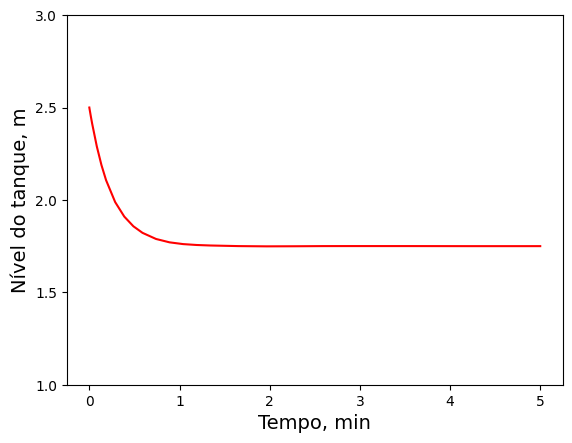

In [33]:
plt.plot(t,x, 'r-')
plt.ylabel('Nível do tanque, m', fontsize=14)
plt.xlabel('Tempo, min', fontsize=14);
plt.yticks(np.arange(1.0,3.5,0.5));